## Visualization - Aided Exploration of Real Estate of Northeastern Region of USA

## Preface: 
I have heard bunch of variations like, " Computers hate me" or " I don't do any CS stuffs". As of someone who did not understand programming before enrolling into the Computer Science major, this does sound familiar. 
Over time taking Honors Seminar: Music and Arts and 2D Design, helped me understand that human beings are visual creatures and process images at an alarming rate. Combining both these aspects of learning - tech and images was challenging and way out of my comfort (especially while adjusting to different language - Python) but was rewarding. I believe crunching down data and findings in a digestible and using simpler explanation can help any non-CS person can follow along and not to be intimidated by coding or technology in general.

In this project, I will be visualizing the real estate data of Northeastern region of the United States. Visualized data helps in analyzing and exploring data that can help identify the areas of improvement within the set of data. Real estate in Northeastern region of the States are affected by myriad of factors, like commercial capitals (New York, Boston), government regulations, demographics of the area, financial stability and many more. 
Data used for this project is broken down at the state level of the Northeastern region. 

First, the modules and library are imported. The functions of each libraries are commented out.

In [1]:
import numpy as np ## for linear algebra 
import datetime # for cleaning data
import pandas as pd ## for processing data, csv files I/O 
import seaborn as sns ## for statistical graphics
import matplotlib.pyplot as plt ## for manipulating elements of a figure, creating plotting area, lines etc

import bar_chart_race as bcr # visual way of displaying data changing over time

import warnings
warnings.filterwarnings("ignore") # suppresing Python warning


## Data Collection and Wrangling

Data used below has been collected from Kaggle ranging from year 2016 August to 2021 August. That way there will not be incomplete year count and will be relevant to the current time. Generally, the first half of the year is the market for seller.
Source of data: https://www.realtor.com/research/data/

After the data has been read, data is cleaned and formatted. Only the northeastern states are extracted out from the dataset for visualization.

In [2]:
df_kaggle = pd.read_csv("MM_DataNEUSA_Sales.csv")
print ("In this dataset, we have", df_kaggle.shape[0], " records and", df_kaggle.shape[1],  " columns.")

#Data Cleaning : Formating date and renaming state column as Northeastern States

df_kaggle['month_date_yyyymm'] = pd.to_datetime(df_kaggle['month_date_yyyymm'],format = '%Y%m')
df_kaggle.rename({"month_date_yyyymm":"Date", "state": "Northeastern_states" }, axis = 'columns', inplace = True)

#extract only northeastern states
northeastern_states = ["maine","new hampshire","new york","new jersey","pennsylvania","connecticut",
                                          "rhode island","vermont","massachusetts"]
df_nestate = df_kaggle.loc[df_kaggle["Northeastern_states"].isin(northeastern_states)] # selecting all rows from given options of states
print ("After filtered dataset to northeastern region, we have", df_nestate.shape[0], " records and ", df_nestate.shape[1],  " columns.")
df_nestate.head(10) ## prints first 10 rows of filtered dataframe

In this dataset, we have 3112  records and 39  columns.
After filtered dataset to northeastern region, we have 549  records and  39  columns.


Date Northeastern_states state_id  median_listing_price  \
2  2021-07-01             vermont       vt              350000.0   
7  2021-07-01        pennsylvania       pa              275000.0   
13 2021-07-01        rhode island       ri              419900.0   
26 2021-07-01       massachusetts       ma              649000.0   
28 2021-07-01               maine       me              339900.0   
32 2021-07-01         connecticut       ct              489900.0   
41 2021-07-01       new hampshire       nh              424900.0   
44 2021-07-01          new jersey       nj              445000.0   
50 2021-07-01            new york       ny              560000.0   
62 2021-06-01               maine       me              338750.0   

    median_listing_price_mm  median_listing_price_yy  active_listing_count  \
2                   -0.0210                   0.0888                  1692   
7                   -0.0177                   0.0599                 21342   
13                   0.0344                  -0.0107                  1417   
26                  -0.0159                   0.0469                  9209   
28                   0.0034                   0.1368                  3536   
32                  -0.0092                   0.2295                  7764   
41                   0.0130                   0.0827                  2321   
44                  -0.0089                   0.0023                 25084   
50                  -0.0300                   0.0626                 57328   
62                  -0.0007                   0.1701                  2996   

    active_listing_count_mm  active_listing_count_yy  median_days_on_market  \
2                    0.0702                  -0.4540                   46.0   
7                    0.1037                  -0.2037                   41.0   
13                   0.1400                  -0.2811                   30.0   
26                   0.0205                  -0.2615                   31.0   
28                   0.1802                  -0.3571                   33.0   
32                   0.0774                  -0.5490                   36.0   
41                   0.1105                  -0.2664                   28.0   
44                   0.0599                  -0.1966                   36.0   
50                   0.0123                  -0.1335                   73.0   
62                   0.2249                  -0.4651                   28.0   

    ...  median_square_feet_yy  average_listing_price  \
2   ...                -0.0562           5.383490e+05   
7   ...                -0.0564           4.012947e+05   
13  ...                -0.0962           7.778582e+05   
26  ...                -0.0911           1.182808e+06   
28  ...                -0.0070           5.076741e+05   
32  ...                 0.0021           1.143219e+06   
41  ...                -0.0486           5.736333e+05   
44  ...                -1.0000           6.511915e+05   
50  ...                -0.1042           1.215842e+06   
62  ...                -0.0047           5.062248e+05   

    average_listing_price_mm  average_listing_price_yy  total_listing_count  \
2                    -0.0319                    0.1535                 2809   
7                    -0.0296                    0.0684                47225   
13                   -0.0137                    0.0486                 4045   
26                   -0.0149                    0.1906                12664   
28                    0.0029                    0.1351                 4852   
32                   -0.0216                    0.4159                18426   
41                    0.0162                    0.1052                 4231   
44                   -0.0212                    0.0131                45290   
50                   -0.0419                    0.1165                91653   
62                   -0.0132                    0.1787                 4194   

    total_listing_count_mm  total

In [3]:
#df_nestate.describe().T #describes the statistics of the dataframe, transpose for better viewing

By removing the hashtags(##) or uncommenting the code, we can see what each column of data displays. Some valuable information like the count of values, mean, standard deviation, min/max and quartiles of each columns are interpreted.

In [4]:
#sorting the data by state and date to simplify visualization
df_sort = df_nestate.sort_values (["Northeastern_states","Date"],axis = 0, ascending = [True, True]).reset_index(drop = True)


## Comparison of Real Estate of Northeastern region of the United States

The Jupyter Notebook analyzed the average housing price of these states from 2016 - 2021 (source: Kaggle) through box plots and bar chart races. 

# Boxplot

One way to plot boxplot is using seaborn library. Vertical box plot is grouped by categorical variables (States).
The code below passes the panda dataframe (our data) into seaborn's boxplot. 

Text(0.5, 1.0, 'Avg. housing price of Northeastern states')

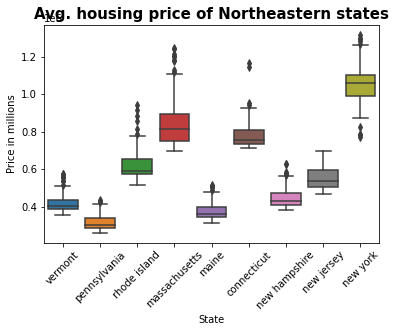

In [5]:
#Visualization
# compute mean per group and find index after sorting in ascending order
box_plot = sns.boxplot(x = 'Northeastern_states', y = 'average_listing_price', data = df_nestate)
plt.ylabel('Price in millions')
plt.xlabel('State')
plt.xticks(rotation = 45)
plt.title("Avg. housing price of Northeastern states", fontsize = 15, fontweight = 'bold')

Let's take example of red box plot that represents Massachusetts. The bottom black horizontal line is minimum housing price value (somewhere between 0.6 - 0.8) and top black horizontal line (between 1.0 - 1.2) is maximum value for that red box. The first black horizontal line of the rectangular red box plot is first quartile (25%), the line in between the box plot is second quartile (50%) and third black line of the box represents the third quartile (75%). 
The diamond shaped value present at the top of the horizontal line (in this case) is outlier data or erroneous data.

# Bar Chart Race

Bar Chart Race graph is a comprehensible representation of dataset over time. Below the average housing price of the real estate from mid 2016 to mid 2021 is viualized in an animated bar chart. Since it is self-explanatory chart and is visually appealing, it received huge audience in the last few years.

In [6]:
df_race = df_sort[['Date','Northeastern_states','average_listing_price']]
#create spreadsheet style pivot table. Values display the statistical summary of feature, index is the featured
#passed in values argument. Columns aggregates values according to the features. 
df_race=df_race.pivot_table(values = 'average_listing_price',index=['Date'],columns = 'Northeastern_states') 
df_race

Northeastern_states   connecticut        maine  massachusetts  new hampshire  \
Date                                                                           
2016-07-01           7.598300e+05  331254.6000   6.964768e+05    388414.6333   
2016-08-01           7.506584e+05  332513.9006   6.950805e+05    384805.7158   
2016-09-01           7.565740e+05  330161.7855   6.952674e+05    387083.3655   
2016-10-01           7.657705e+05  328398.3357   6.980840e+05    401398.3458   
2016-11-01           7.722720e+05  328159.4010   7.037814e+05    393724.1198   
...                           ...          ...            ...            ...   
2021-03-01           9.436239e+05  489828.8378   1.212968e+06    629367.8929   
2021-04-01           9.165335e+05  515714.0586   1.248178e+06    587768.8035   
2021-05-01           8.984697e+05  512987.3666   1.239836e+06    571768.7245   
2021-06-01           1.168469e+06  506224.8076   1.200666e+06    564468.8900   
2021-07-01           1.143219e+06  507674.1075   1.182808e+06    573633.2588   

Northeastern_states   new jersey      new york  pennsylvania  rhode island  \
Date                                                                         
2016-07-01           482513.6020  7.862448e+05   272366.6627   539143.5216   
2016-08-01           478760.4428  7.734834e+05   270407.8052   535634.2990   
2016-09-01           480283.8117  7.847256e+05   271526.0676   524995.7656   
2016-10-01           482912.0250  8.247852e+05   271621.7676   517423.0132   
2016-11-01           483809.9124  8.744485e+05   270294.0491   522212.3088   
...                          ...           ...           ...           ...   
2021-03-01           695102.2495  1.295947e+06   432894.3086   917678.3864   
2021-04-01           691526.6734  1.315247e+06   438361.1749   882530.8173   
2021-05-01           680342.4981  1.297325e+06   426755.0953   813859.0833   
2021-06-01           665323.9338  1.269033e+06   413517.8805   788673.6553   
2021-07-01           651191.5334  1.215842e+06   401294.6952   777858.2086   

Northeastern_states      vermont  
Date                              
2016-07-01           358648.3840  
2016-08-01           358848.4227  
2016-09-01           360148.8716  
2016-10-01           363225.2592  
2016-11-01           369521.7021  
...                          ...  
2021-03-01           575378.2998  
2021-04-01           577795.3699  
2021-05-01           558232.2729  
2021-06-01           556068.4730  
2021-07-01           538348.9867  

[61 rows x 9 columns]

In [23]:
bcr.bar_chart_race(df_race, n_bars = 10, sort = 'desc',title="Northeastern state's housing price 2016 - 2021", steps_per_period = 20, figsize = (5,2), filename = None )

Refer back to the avg_listing_price.gif to see the animated bar chart.

## Models

We will now be observing the dataset which was manually populated in Excel. Majority of data were collected from US Census, followed by Zillow, Wikipedia. 21 features of the real estates like median listing price, Home Value Index, housing units, Crime rate per 100,000 populations are populated according to states. 
One should refer to the excel file (Analysis_Test.xlsx) to understand the data sets before diving into this section.

In [8]:
#Read in data
df_reg = pd.read_csv(r"Analysis_Test.csv")
df_reg.fillna(df_reg.median(), inplace=True) # data wranging, filling NA values with median of data column
df_reg

States  Crime rate per 100,000 population  \
0   Connecticut                              181.6   
1   Connecticut                              184.6   
2   Connecticut                              209.6   
3   Connecticut                              229.2   
4   Connecticut                              227.7   
..          ...                                ...   
94      Vermont                              102.6   
95      Vermont                              114.9   
96      Vermont                              142.3   
97      Vermont                              135.2   
98      Vermont                              130.2   

    ZHVI (Zillow Home Value Index)  Total housing Units  Median Income  \
0                           247706              1491786          79043   
1                           244109              1524992          88380   
2                           244017              1521019          72812   
3                           243569              1517251          74304   
4                           242921              1512528          75923   
..                             ...                  ...            ...   
94                          227102               328991          60708   
95                          227340               327315          54842   
96                          227048               327315          55582   
97                          227889               324434          51862   
98                          229681               322975          55928   

    median_listing_price  active_listing_count  new_listing_count  \
0               385000.0               11930.0             2860.0   
1               353688.0               17249.0             2112.0   
2               339900.0               20677.0             2848.0   
3               339900.0               19895.0             2644.0   
4               339900.0               21450.0             3252.0   
..                   ...                   ...                ...   
94              339450.0               14294.0             2644.0   
95              339450.0               14294.0             2644.0   
96              339450.0               14294.0             2644.0   
97              339450.0               14294.0             2644.0   
98              339450.0               14294.0             2644.0   

    price_increased_count  price_reduced_count  ...  median_square_feet  \
0                   136.0               1240.0  ...              2016.0   
1                    68.0               1828.0  ...              2083.5   
2                    84.0               2336.0  ...              1888.0   
3                   116.0               2216.0  ...              1579.0   
4                    92.0               2320.0  ...              1976.0   
..                    ...                  ...  ...                 ...   
94                   92.0               1828.0  ...              1677.0   
95                   92.0               1828.0  ...              1677.0   
96                   92.0               1828.0  ...              1677.0   
97                   92.0               1828.0  ...              1677.0   
98                   92.0               1828.0  ...              1677.0   

    average_listing_price  total_listing_count  pending_ratio  \
0             847461.2371              12088.0       0.013244   
1             724776.1123              17340.0       0.005276   
2             732724.4979              20747.0       0.003385   
3             715891.4913              20147.0       0.012666   
4             768576.4007              25152.0       0.172587   
..                    ...                  ...            ...   
94            522433.7284              16375.0       0.205254   
95            522433.7284              16375.0       0.205254   
96            522433.7284              16375.0       0.205254   
97            522433.7284              16375.0       0.205254   
98            522433.7284 

Data Dictionary is provided alongside sources of data in the Excel file attached with the Honors Project.

## Correlation

The following chart shows how related are each variables with each other. Red shows positive correlation and blue shows negative correlation. The darker the shade of color, the stronger the relation between these variables. If the two variables are related it means that when one changes by a certain amount the other changes on an average by a certain amount ( either directly proportional or indirectly proportional)

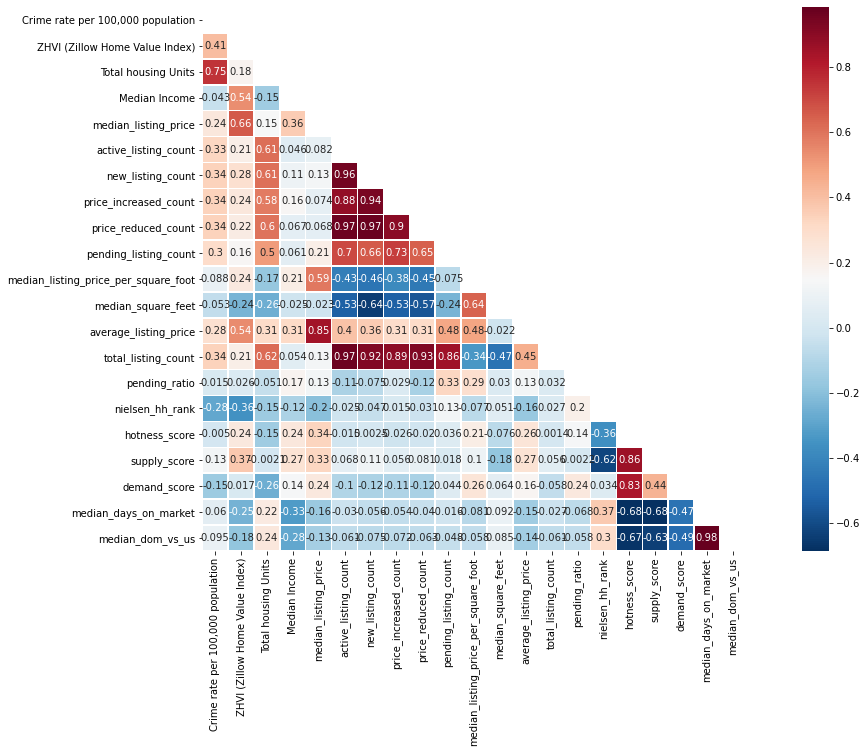

In [9]:
plt.figure(figsize=(10,8))
cm = df_reg.corr(method='pearson')
# applying mask for lower triangular matrix
mask = np.triu(np.ones_like(df_reg.corr()))
sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True,mask = mask)
plt.gcf().set_size_inches(20, 10)
plt.show()

-1 and +1 refers to perfectly negative correlation and positive correlation respectively. In this figure, we used lower triangle correlational matrix. The point at which the line of both variables meet, gives us numerical values of correlational coefficient. For example, 0.41 at the top of the matrix, shows the positive correlation coefficient of ZHVI and Crime rate. Similarly, the correlation coefficient of pending ratio with Total housing units is negative 0.051.

## Multiclass logistic regression (Softmax regression)

Logistic regression is only suitable for predicting probability on a binary range from 0 to 1. As my target model is States, where there are more than 2 number of classes (i.e. 9 states) , I am using Softmax Regression to handle multiple states. 

To understand the performance of the model, the dataset is divided into training and test set and splitted in a ratio of 80:20, meaning 80% of data is used for model training and the rest is for model testing. This way, we can predict how accurate is our data. 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
# Define the features and target (X and y)
pd.unique(df_reg["States"]) # target class

X = df_reg.drop(["States"], axis = 1).astype(float)

#creating target vector and converting to numeric codes (for visualization)
y = df_reg["States"]
y_numeric_dict={'Connecticut':1,'Maine':2,'Massachusetts':3, 'New Hampshire': 4,
               'New Jersey' : 5, 'New York': 6, 'Pennsylvania': 7, 'Rhode Island':8,
               'Vermont': 9}
y = y.apply(lambda x: y_numeric_dict[x])


We are going to measure the quality of our model predictions. First, we create k-nearest-neighbors model to classify data. K-nearest neighbors estimates the likelihood of data point based on what group the data points is nearest to. 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix
# Set up the model we will use
# general rule of thumb for n_neighbors : square root of samples (eg:79 for this project)
knn_model = KNeighborsClassifier(n_neighbors=10) 

The function run_model splits data into training and test set. It generates predictions on the test set and train training set to measure the accuracy of our model. 

In [13]:
def run_model(X,y,model):
    '''
    Train model and generate test set predictions
    Args: 
        X: input feature matrix
        y: target array
        model: instantiated model
    Returns: 
        X_test: test set inputs
        y_test: test set targets
        preds: predictions on test set
    '''
    # Split into training and test sets, using 20% of our data for a test set
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.20)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    
    return X_test, y_test, preds
    
    raise NotImplementedError()
    

Confusion matrix for our model:


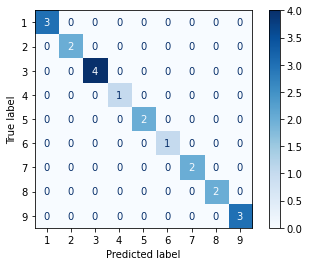

In [14]:
# Test cell for 'run_model'
X_test, y_test, preds = run_model(X,y,knn_model)

print('Confusion matrix for our model:')
plot_confusion_matrix(knn_model, X_test, y_test,cmap=plt.cm.Blues,normalize=None)
plt.show()

In the matrix, consider:
'Connecticut':1,'Maine':2,'Massachusetts':3, 'New Hampshire': 4, 'New Jersey' : 5, 'New York': 6, 'Pennsylvania': 7, 'Rhode Island':8, 'Vermont': 9

The model shows that Massachusetts (labeled as 3) 's data was more consistent and has similar housing patterns throughout the state. 
In other hand, since there is a high disparity of housing price of New York, ranging from couple thousands to hundreds of millions,  it is almost impossible to understand how the housing price of whole NY state can be averaged. Since the model recognized inconsistent data pattern of NY, it did not fit well, hence 1 out of 4. 

## Testing model accuracy



In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (n_scores.mean(), n_scores.std()))

Mean Accuracy: 0.929 (0.069)


As we can see above, the model achieved a mean classification accuracy of 92.9 % on our real estate dataset. This is an impressive accuracy on the test set.

However, it is necessary to understand that since there is a huge variation of the real estate values within the same geographical region (eg: New York has huge disparity in real house price in regards to its location as stated in our visualization). 
The Softmax Regression was not the best model to describe our real estate model as it does not give idea on variations of prices of the state rather gives an idea on what states was most favored by our data. This results in biasedness as not all zip codes were taken into considerations but an average or median value of the state.

## Linear Regression


Akaike Information Criterion (AIC) compares the quality of model based on data. I had to import the file after coding in R as Python does not support the functionality.
However, I coded some forms in Python, which does not necessarily agree with R and has lesser accuracy than R. I will be sticking with prediction made by R as the result is more reliable.

In [16]:
import statsmodels.api as sm

# load data

X = df_reg.drop(["States", "average_listing_price"], axis = 1)
y = df_reg["average_listing_price"]

#add constant to predictor variables
X2 = sm.add_constant(X)
est = sm.OLS(y, X2.astype(float))
#attempt to fit regression model
est2 = est.fit()
print(est2.summary())

                              OLS Regression Results                             
Dep. Variable:     average_listing_price   R-squared:                       0.955
Model:                               OLS   Adj. R-squared:                  0.943
Method:                    Least Squares   F-statistic:                     82.51
Date:                   Wed, 13 Apr 2022   Prob (F-statistic):           3.75e-44
Time:                           23:02:24   Log-Likelihood:                -1176.5
No. Observations:                     99   AIC:                             2395.
Df Residuals:                         78   BIC:                             2449.
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

## R predictions of variables

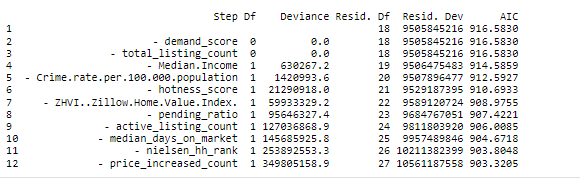

R predicted that 11 data features were considered valuable attributes to our average real estate pricing estimates. 



We will now drop the variables with p-value higher than 0.05 as they are meaningless variables to our model. 
That leaves us with : ZHVI,Total housing units, median_listing_price, active_listing_count, new_listing_count, price_increased_count, price_reduced_count, pending_listing_count, median_listing_price_per_square_foot, median_square_feet, total_listing_count. 
In regression we omits some independent variables that do not have much impact on the dependent variable, the intercept tells the average value of these omitted variables and noise present in model.

## Principal Component Analysis

We have 22 sets of variables and it is impossible to fit each variables with the listing price of real estate.
This is when Principal Componenet Analysis (PCA) comes handy as it reduces the related data together.
For eg: Area of room, No of rooms can be grouped into size feature. Crime Rate, Infrastructures can be grouped into location features to reduce dimensionality of data.

First, we start by standardizing data as it is common practice to normalize the data before further application of machine learning. We scale data by fit_transform() on feature data. Each feature will be normally distributed - mean of zero and std devidation of one. We can also access the components of pca with (.components) method.

In [17]:
from sklearn.preprocessing import StandardScaler
#fitting the PCA

df_norm = df_reg.drop("States", axis = 1)

df_PCA = StandardScaler().fit_transform(df_norm) # normalizing the features

df_PCA = pd.DataFrame(df_PCA)

from sklearn.decomposition import PCA

pca = PCA(n_components = 4)  # project from 21 to 4 dimensions

pca.fit(df_PCA)

#Accessing the components
pca.components_

array([[ 1.83978410e-01,  1.54260863e-01,  2.66303792e-01,
         5.98240902e-02,  1.03087678e-01,  3.62521104e-01,
         3.69726953e-01,  3.52691427e-01,  3.59405929e-01,
         2.92397809e-01, -1.23612317e-01, -2.23163508e-01,
         1.93136928e-01,  3.64561577e-01, -2.47936053e-05,
        -4.94753779e-02,  3.54905839e-02,  7.97936196e-02,
        -2.42335583e-02, -4.39818693e-02, -4.65495100e-02],
       [-6.63891596e-03, -2.25715490e-01,  1.15467479e-01,
        -2.23033592e-01, -2.67646721e-01,  7.51042544e-02,
         6.04975419e-02,  6.57173421e-02,  7.85795628e-02,
         1.72169962e-02, -2.30651615e-01, -4.06485988e-02,
        -2.09758546e-01,  6.03790218e-02, -8.87477486e-02,
         2.11954285e-01, -3.99434118e-01, -3.71355081e-01,
        -3.02956713e-01,  3.61754026e-01,  3.44685251e-01],
       [ 2.56561183e-01,  2.44194226e-01,  1.78033703e-01,
         9.40170173e-02,  3.89139106e-01, -7.36918653e-02,
        -8.45402242e-02, -6.22582772e-02, -9.60698899e

In [18]:
#Apply the transformation and convert the result into a DataFrame.
columns = ["PCA"+str(x) for x in range(1,pca.n_components_+1)]
df_pca = pd.DataFrame(pca.transform(df_PCA), columns=columns)
df_pca.tail()

PCA1      PCA2      PCA3      PCA4
94 -1.244742 -0.162538 -0.804357  0.587608
95 -1.523454  2.784093  0.630199  0.604719
96 -1.536873  2.347702  0.429860  1.715031
97 -1.453186  2.368779  0.365540  0.571030
98 -1.425499  2.361646  0.351001  0.696570

We will find explained_variance_ratio. Highest variance causing feature will be the first principal component and so on.

In [19]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.32330413 0.22143267 0.12261058 0.08474567]


It shows that principal component 1 holds 32% of information, principal component 2 holds 22% of information, 12% by principal component 3 and 8% by principal component 4. About 25% of data information was lost during the analysis. 
Now let's visualize the samples along 4 principal components to understand how our samples are distributed among nine classes.

# Scree Plot

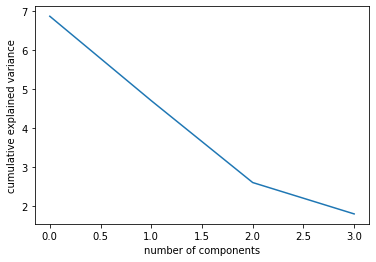

In [20]:
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

The plot is just an evidence that most of the features are explained by PCA1 and PCA2. 

## 3D Plot of Principal Components

Below figure helps us observe classes (listed in legend) and how they are separated up to some extent.The points belonging to the same class are close to each other, and the points or images that are very different semantically are further away from each other. New York's housing price is spread out compared to any other states. 
Hover the mouse around to see the model from different angles.

In [21]:
import plotly.express as px

fig = px.scatter_3d(pca.transform(df_PCA), x=0, y=1,z =2, color=df_reg['States'])
fig.show()

## Effect of variables on each components

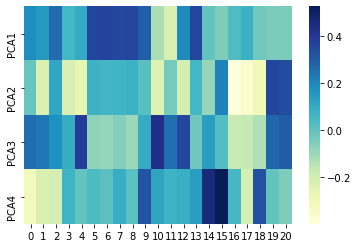

In [22]:
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(df_PCA.columns),
                 cbar_kws={"orientation": "vertical"})
try:
    ax.set_aspect("equal", figsize(50,30))
except Exception:
    pass

The above heatmap shows influence of each PCA components on each features. Features are listed in range of 0 to 20 where 0 stands for States, 1 for Crime rate per 100,000 population and so on. (Refer to Excel File to understand what each number stands for.)

The project visualized data in an appealing way and in a way that does not just limit the people from CS domain to understand. We also predicted some variables like Median Income, ZHVI as essential attributes to average listing price of the real estate of that particular states. We also saw that the real estate pricing of New York fits differently as there is disparity in housing prices of different locations of the state. It has been evidently shown in animated bar chart, and interactive 3D model of PCA.
However, as the data collection was just a prototype, we cannot come with the effective conclusion. 
I hope you had fun exploring data and understanding the complexities of machine learning. 